Понижение размерности для ускорения обучения и удаления шумов!

PCA, KernalPCA, MDS, Isomap, t-SNE, LDA(Перед SVM топ), UMAP, LLE

инкрементный PCA, если не умещается в памяти или необходимо динамическое обучение.

можно комбинировать методы, например, PCA И LLE

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()

X = iris["data"]
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

pca = PCA(n_components=2)

X2D = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

92% лежит вдоль первого компонента, 5% второго и 3% остальные

Выбор числа измерений, который учитывает 95% дисперсии

In [2]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=d)

X2D = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [3]:
# Улучшенный код
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [4]:
import pandas as pd

data = pd.read_csv("sample_data/mnist_test.csv")

y = data["7"].values
X = data.drop("7", axis=1).values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

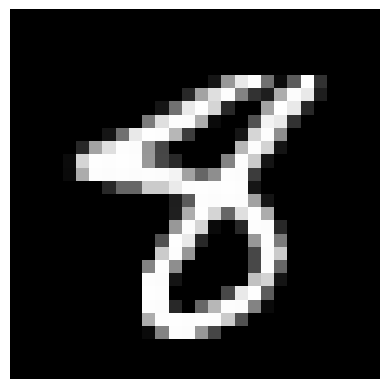

In [6]:
import matplotlib.pyplot as plt

image_data = X_train.reshape((-1, 28, 28))

image = image_data[1]

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
pca = PCA(n_components=0.95)

X_reduced = pca.fit_transform(X)
res = pca.explained_variance_ratio_
len(res)

149

In [8]:
pca = PCA(n_components=150)

X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

print(X_reduced.shape)
print(X_recovered.shape)

(9999, 150)
(9999, 784)


Стохастический алгоритм

In [9]:
pca = PCA(n_components=150, svd_solver="randomized") # full

X_reduced = pca.fit_transform(X)

Incremental PCA. использует мини-пакеты

In [10]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=74)
for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X)

In [11]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)

X_reduced = rbf_pca.fit_transform(X)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])
param_grid = {
    "kpca__gamma": np.linspace(0.03,0.05,10),
    "kpca__kernel": ["rbf", "sigmoid"]
}
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


In [13]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.433, fit_inverse_transform=True)

X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [14]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

4382.446716234237

In [16]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

X_reduced = lle.fit_transform(X)